# Discovery:

Our topic of interest is technology. Moreover, the objective of our analysis is  to perform a comprehensive analysis to provide
insights and predictions to the stakeholders for possible future decisions. 

This is the link for our data set:
https://www.kaggle.com/datasets/muhammetvarl/laptop-price

# Data preparation: 

## Read the selected data, list the fields/variables, and identify their types.

In [1]:
# Read the selected data:
import pandas as pd 
df = pd.read_csv("laptop_price.csv")
df.info()
print(f"The names of the varibles are: {df.columns.tolist()}")
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
The names of the varibles are: ['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


|  Field            |     Type    |
|:-----------------:|:-----------:|
|  laoto_ID         |   Ordinal   |
|  Company          | Categorical |
|  Product          | Categorical |
|  TypeName         | Categorical |
|  OpSys            | Categorical |
|  Gpu              | Categorical |
|  ScreenResolution | Categorical |
|  Inches           | Numric      |
|  Memory           | Categorical |
|  TotalMemoryInGB  | Numric      |
|  Ram              | Numric      |
|  Cpu              | Categorical |
|  Weight           | Numric      |
|  Price_euros      | Numric      |

Most of these variables will be splitted or dropped that's why I included another field types table for the final variables.

## List the inconsistencies, missing data, and outliers. Fix the inconsistencies, impute the missing data and remove the outliers

In [2]:
#Inconsistencies: Most of the memory rows are in GB but some are in TB for example row 1301.
display(df.isna().sum()) # No missing data in the original data frame.
#but there will be a missing data after preparing the variables they will be imputed later.
# No outlires.

# T will be replaced by GB to resolve the inconsistencie.
df["Memory"] = df["Memory"].apply(lambda x: x.replace("1TB", "1000GB") if "TB" in x else x)
df["Memory"] = df["Memory"].apply(lambda x: x.replace("2TB", "2000GB") if "TB" in x else x)
df["Memory"] = df["Memory"].apply(lambda x: x.replace("1.0TB", "1000GB") if "TB" in x else x)


#Creating outliers in column "Inches"
df["Inches"]=df["Inches"].apply(lambda x: float(str(x).replace(str(x),"-" + str(x)) if x == 13.3 else x))

#Removing the outliers in coulmn "Inches" which are negative values since dimensions cannot be negative 
df["Inches"]=df["Inches"].apply(lambda x: x if x>=0 else abs(x))

display(df.head(13))

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


## Splitting and modifying columns

### Splitting ScreenRosulotion:

In [3]:
# Firstly ScreenResolution will be splitted to three columns: ScreenType, PixelsInWidth and PixelsInHeight.
# Then the total pixels will be calculated and used as a varible for our data frame
ScreenType = []
PixelsInWidth = []
for row in df["ScreenResolution"]:
    result = ""
    for character in row:
        if character.isalpha() or character == " ":
            result+=character
        else:
            if result == "":
                result = None
            break
    ScreenType.append(result)
    

df["ScreenType"] = ScreenType


for row in df["ScreenResolution"]:
    result = ""
    for character in row:
        if character.isdigit():
            result+=character
        elif character == "x":
            break
    if len(result) == 5:
        result = result[1::]
    PixelsInWidth.append(int(result))
    
df["PixelsInWidth"] = PixelsInWidth
df["PixelsInHeight"] = df["ScreenResolution"].apply(lambda x: int(x[x.find("x") + 1::]))
df["TotalPixelsInKp"] = df["PixelsInHeight"] * df["PixelsInWidth"] / 10000

### Splitting Memory:

In [4]:
import numpy as np
memoryType = []
memory1InGB = []
memory2InGB = []
for value in df["Memory"]:
    memory = ""
    memory1 = ""
    memory2 = ""
    has2memories = False
    for ch in value:
        if ch.isalpha() and ch != "G" and ch != "B" :
            memory += ch
        elif ch.isdigit() and not has2memories:
            memory1 += ch
        elif ch.isdigit():
            memory2 += ch
        elif ch == "+":
            memory += ch
            has2memories = True
    if not has2memories:
        memory2 = "0"
    memoryType.append(memory)
    memory1InGB.append(int(memory1))
    memory2InGB.append(int(memory2))
#df.drop("Memory",axis="columns")
df["MemoryTypes"] = memoryType
# Adding the two types of memory
memoryInGB = np.array(memory1InGB)+np.array(memory2InGB)
df["TotalMemoryInGB"] = memoryInGB

### Splitting Ram, Weight and Cpu.

In [5]:
df["RamInGB"] = df["Ram"].apply(lambda x: int(x.replace("GB","")))
df["WeightInkg"] = df["Weight"].apply(lambda x: float(x.replace("kg","")))
df["CpuType"] = df["Cpu"].apply(lambda x: x[0:x.find(".") - 1])
df["CpuInGHz"] = df["Cpu"].apply(lambda x: float(x[x.find(".") - 1:x.find(".") + 2])
                                 if x[x.find(".") - 1].isdigit() else None)

In [6]:
# reordering the columns just to look nice:
reorderedColumns = ["Company","Product","TypeName","OpSys","Gpu","ScreenType","TotalPixelsInKp"
       ,"Inches", "MemoryTypes", "TotalMemoryInGB", "RamInGB","CpuType","CpuInGHz","WeightInkg", "Price_euros"]
df = df[reorderedColumns]

display(df.isna().sum()) 
# 331 missing data in ScreenType and 86 missing data in CpuInGHz.
# So ScreenType will be dropped.
df = df.drop("ScreenType",axis = 1)

null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns)

#fill NaN values in CpuInGHz with mean.
for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        print (value)
        value = value[0]
    df[c].fillna(value,inplace=True)

display(df)

Company              0
Product              0
TypeName             0
OpSys                0
Gpu                  0
ScreenType         331
TotalPixelsInKp      0
Inches               0
MemoryTypes          0
TotalMemoryInGB      0
RamInGB              0
CpuType              0
CpuInGHz            86
WeightInkg           0
Price_euros          0
dtype: int64

Columns with NaN values are: Index(['CpuInGHz'], dtype='object')


,Company,Product,TypeName,OpSys,Gpu,TotalPixelsInKp,Inches,MemoryTypes,TotalMemoryInGB,RamInGB,CpuType,CpuInGHz,WeightInkg,Price_euros
0,Apple,MacBook Pro,Ultrabook,macOS,Intel Iris Plus Graphics 640,409.6000,13.3,SSD,128,8,Intel Core i5,2.3,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,macOS,Intel HD Graphics 6000,129.6000,13.3,FlashStorage,128,8,Intel Core i5,1.8,1.34,898.94
2,HP,250 G6,Notebook,No OS,Intel HD Graphics 620,207.3600,15.6,SSD,256,8,Intel Core i5 7200U,2.5,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,macOS,AMD Radeon Pro 455,518.4000,15.4,SSD,512,16,Intel Core i7,2.7,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,macOS,Intel Iris Plus Graphics 650,409.6000,13.3,SSD,256,8,Intel Core i5,3.1,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,Windows 10,Intel HD Graphics 520,207.3600,14.0,SSD,128,4,Intel Core i7 6500U,2.5,1.80,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,Windows 10,Intel HD Graphics 520,576.0000,13.3,SSD,512,16,Intel Core i7 6500U,2.5,1.30,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,Windows 10,Intel HD Graphics,104.9088,14.0,FlashStorage,64,2,Intel Celeron Dual Core N3050,1.6,1.50,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,Windows 10,AMD Radeon R5 M330,104.9088,15.6,HDD,1000,6,Intel Core i7 6500U,2.5,2.19,764.00


### Data Feilds and their type after modifying the data frame:

|  Field            |     Type    |
|:-----------------:|:-----------:|
|  Company          | Categorical |
|  Product          | Categorical |
|  Type Name        | Categorical |
|  OpSys            | Categorical |
|  Gpu              | Categorical |
|  ScreenType       | Categorical |
|  TotalPixelsInKp      | Numric      |
|  Inches           | Numric      |
|  MemoryTypes      | Categorical |
|  TotalMemoryInGB  | Numric      |
|  RamInGB          | Numric      |
|  CpuType          | Categorical |
|  CpuInGHz         | Numric      |
|  WeightInkg       | Numric      |
|  Price_euros      | Numric      |

# Model Planning:

## Statistical summaries.

In [7]:
display(df.describe(include='number'))
display(df.describe(include='object'))

,TotalPixelsInKp,Inches,TotalMemoryInGB,RamInGB,CpuInGHz,WeightInkg,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,216.880666,15.017191,610.904068,8.382195,2.303862,2.038734,1123.686992
std,139.129240,1.426304,467.509021,5.084665,0.495224,0.665475,699.009043
min,104.908800,10.100000,8.000000,2.000000,0.900000,0.690000,174.000000
25%,144.000000,14.000000,256.000000,4.000000,2.000000,1.500000,599.000000
50%,207.360000,15.600000,500.000000,8.000000,2.500000,2.040000,977.000000
75%,207.360000,15.600000,1000.000000,8.000000,2.700000,2.300000,1487.880000
max,829.440000,18.400000,2512.000000,64.000000,3.600000,4.700000,6099.000000


,Company,Product,TypeName,OpSys,Gpu,MemoryTypes,CpuType
count,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,9,110,9,96
top,Dell,XPS 13,Notebook,Windows 10,Intel HD Graphics 620,SSD,Intel Core i5 7200U
freq,297,30,727,1072,281,637,193


##  Univariate graphs

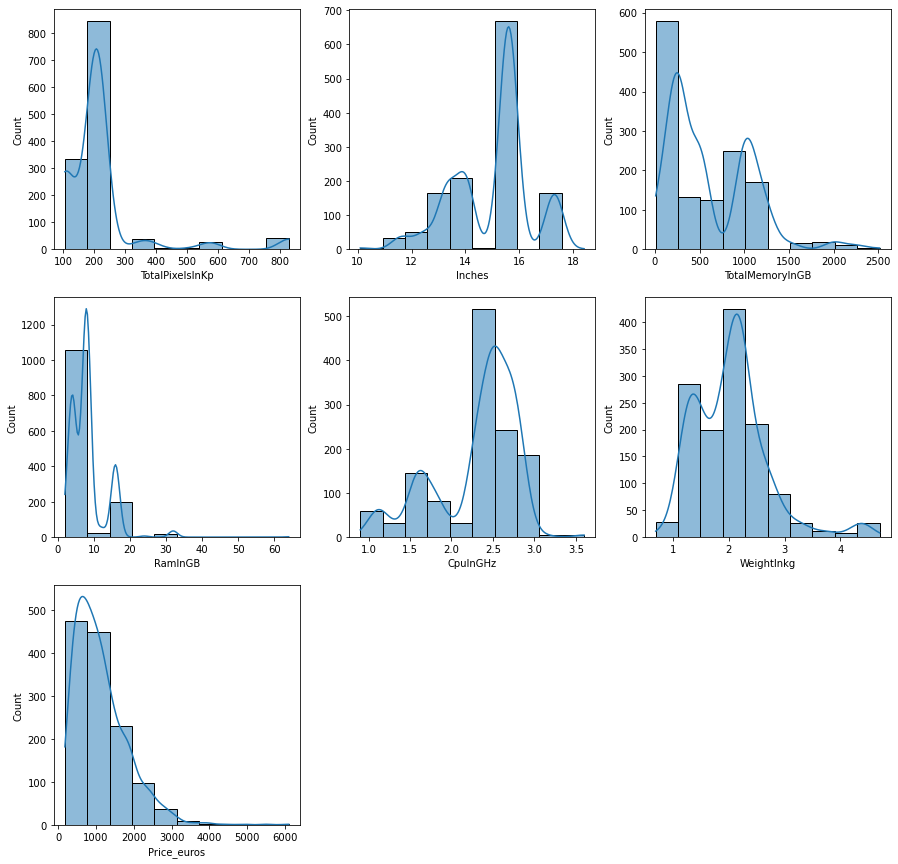

In [8]:
%matplotlib inline

# Load all the libraries
import matplotlib.pyplot as plt
import seaborn as sns

cols = 3
rows = 3
fig = plt.figure(figsize=(cols*5, rows*5))

# Plotting coun plot for numric columns
num_columns = df.select_dtypes(exclude='object').columns
for i, c in enumerate(num_columns):
    ax=fig.add_subplot(cols,rows,i+1)
    sns.histplot(x=c,bins=10,data=df,kde=True,ax=ax);
plt.show()



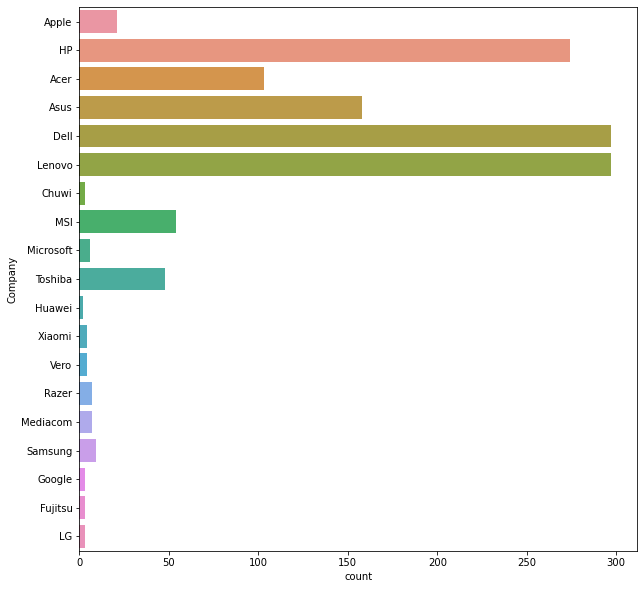

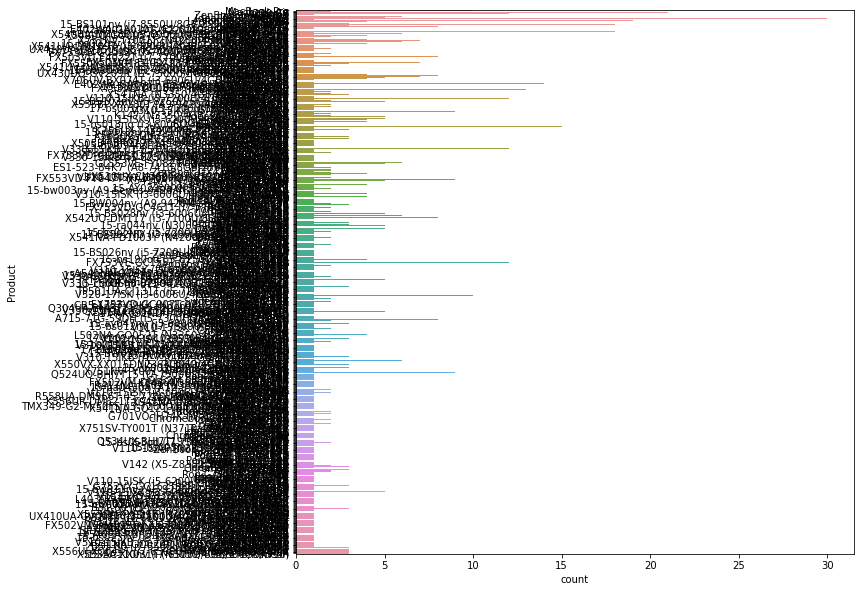

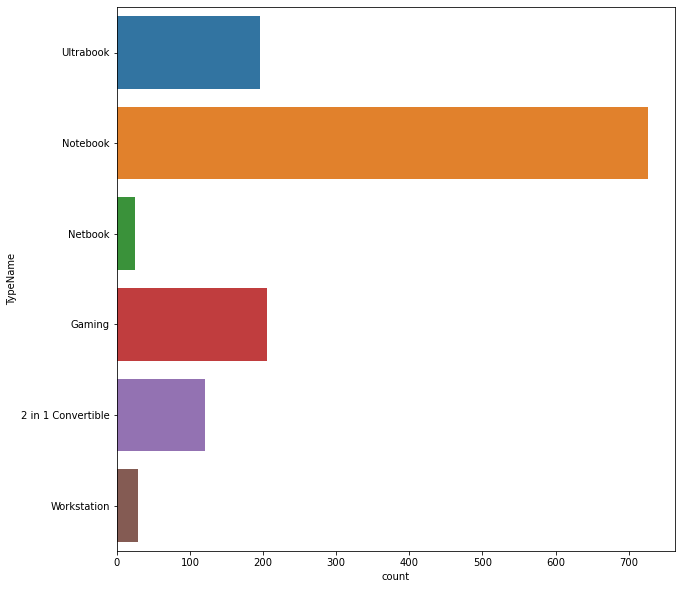

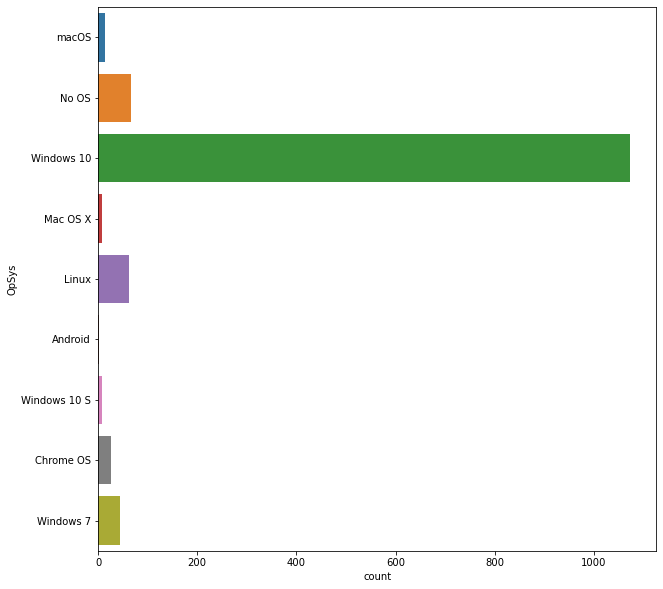

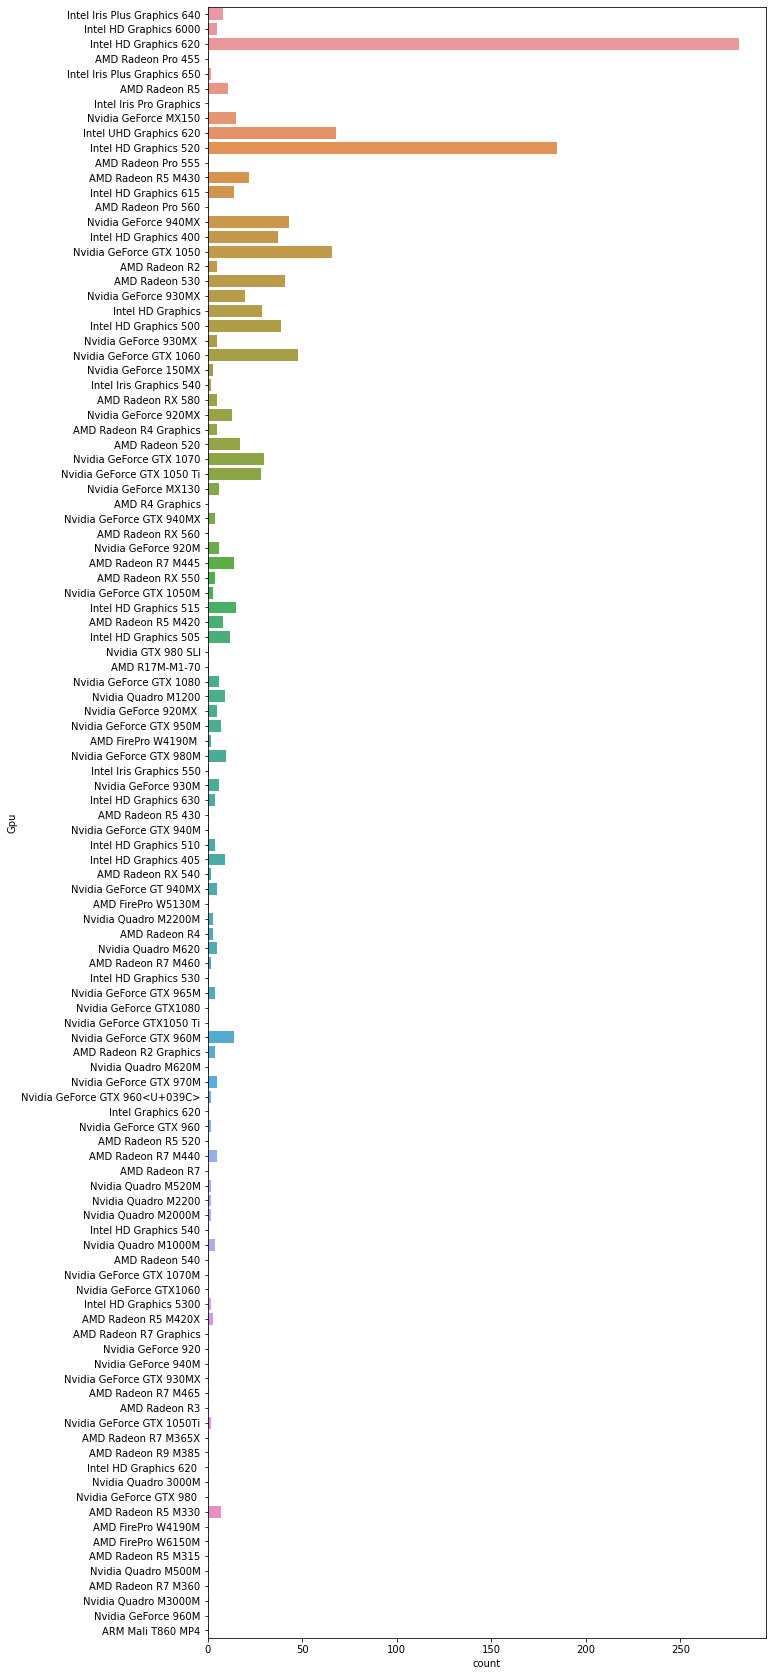

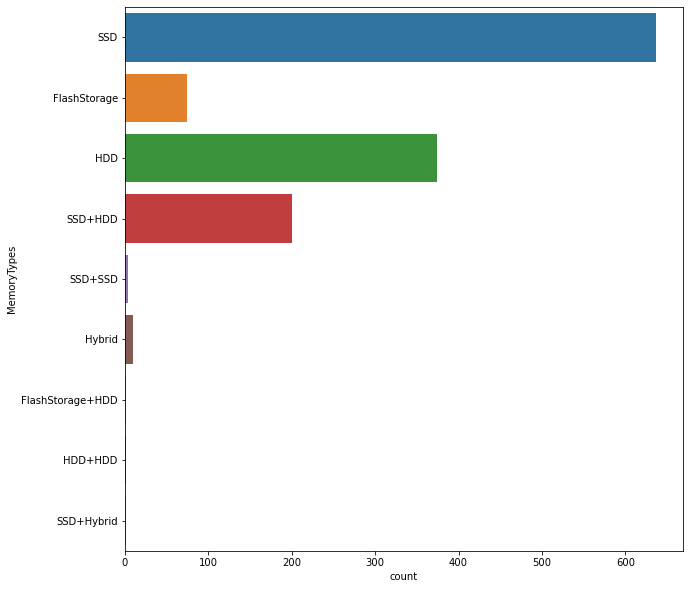

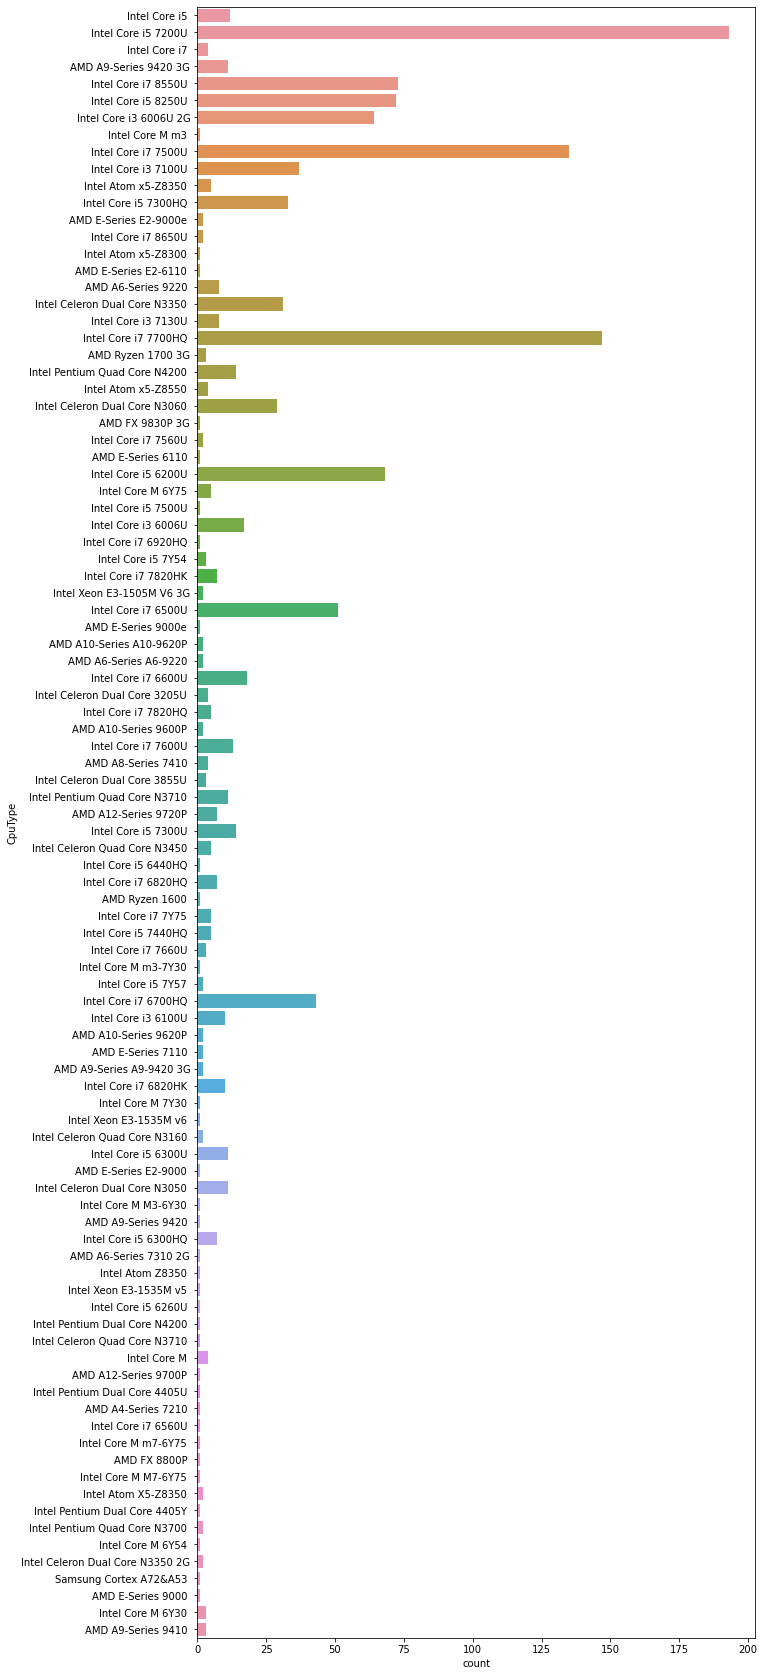

In [9]:
cols = 2
rows = 2

# Plotting count plot for Categorical columns
cat_columns = df.select_dtypes(include='object').columns
for i, c in enumerate(cat_columns):
    if c == "CpuType" or c == "Gpu":
        fig = plt.figure(figsize=(10, 30))
    else:
        fig = plt.figure(figsize=(10, 10))
    sns.countplot(y=c,data=df);
    plt.show()

##  Bivariate plots 

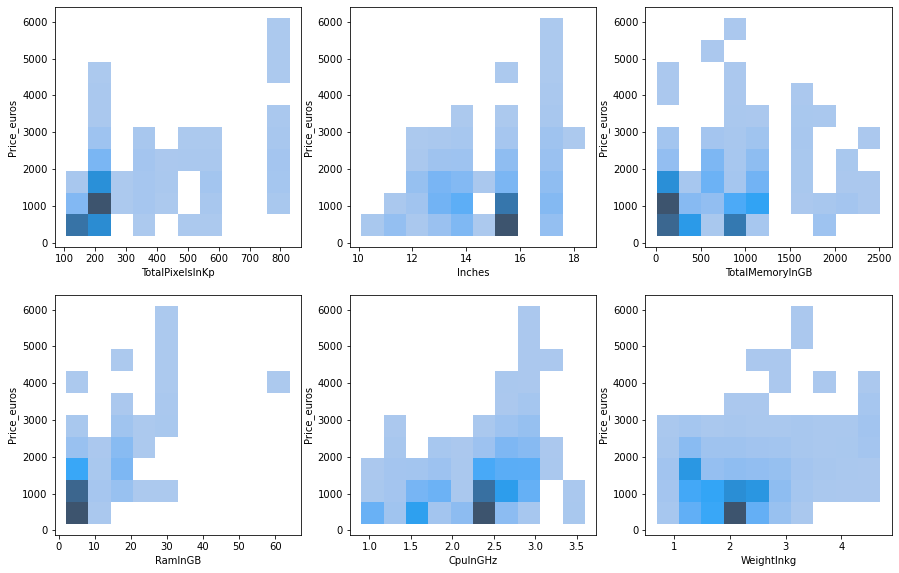

In [10]:
# Boxplot for numric inputs vs output.
cols = 3
rows = 3
fig = plt.figure(figsize=(cols*5, rows*5))
# Hist plot for numric inputs vs output.
for i,col in enumerate(num_columns):
    if col != "Price_euros":
        ax=fig.add_subplot(cols,rows,i+1)
        sns.histplot(x=col,bins=10,data=df,y="Price_euros",ax=ax)
plt.show()

### Approaching the price depending on the memory:

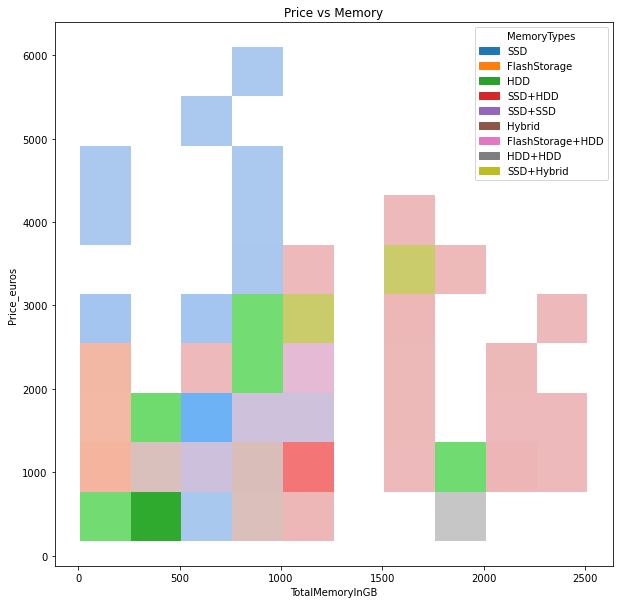

In [11]:
plt.figure(figsize=(10,10))
sns.histplot(x="TotalMemoryInGB",bins=10,data=df,y="Price_euros",hue="MemoryTypes")
plt.title("Price vs Memory")
plt.show()

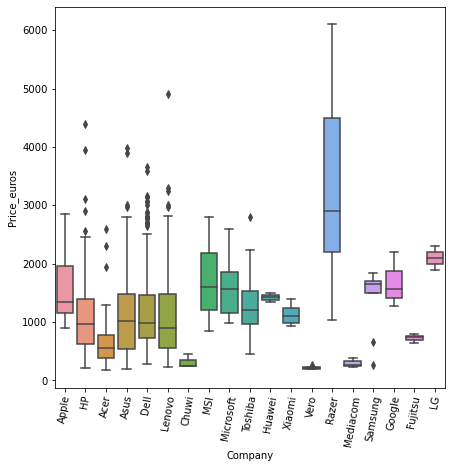

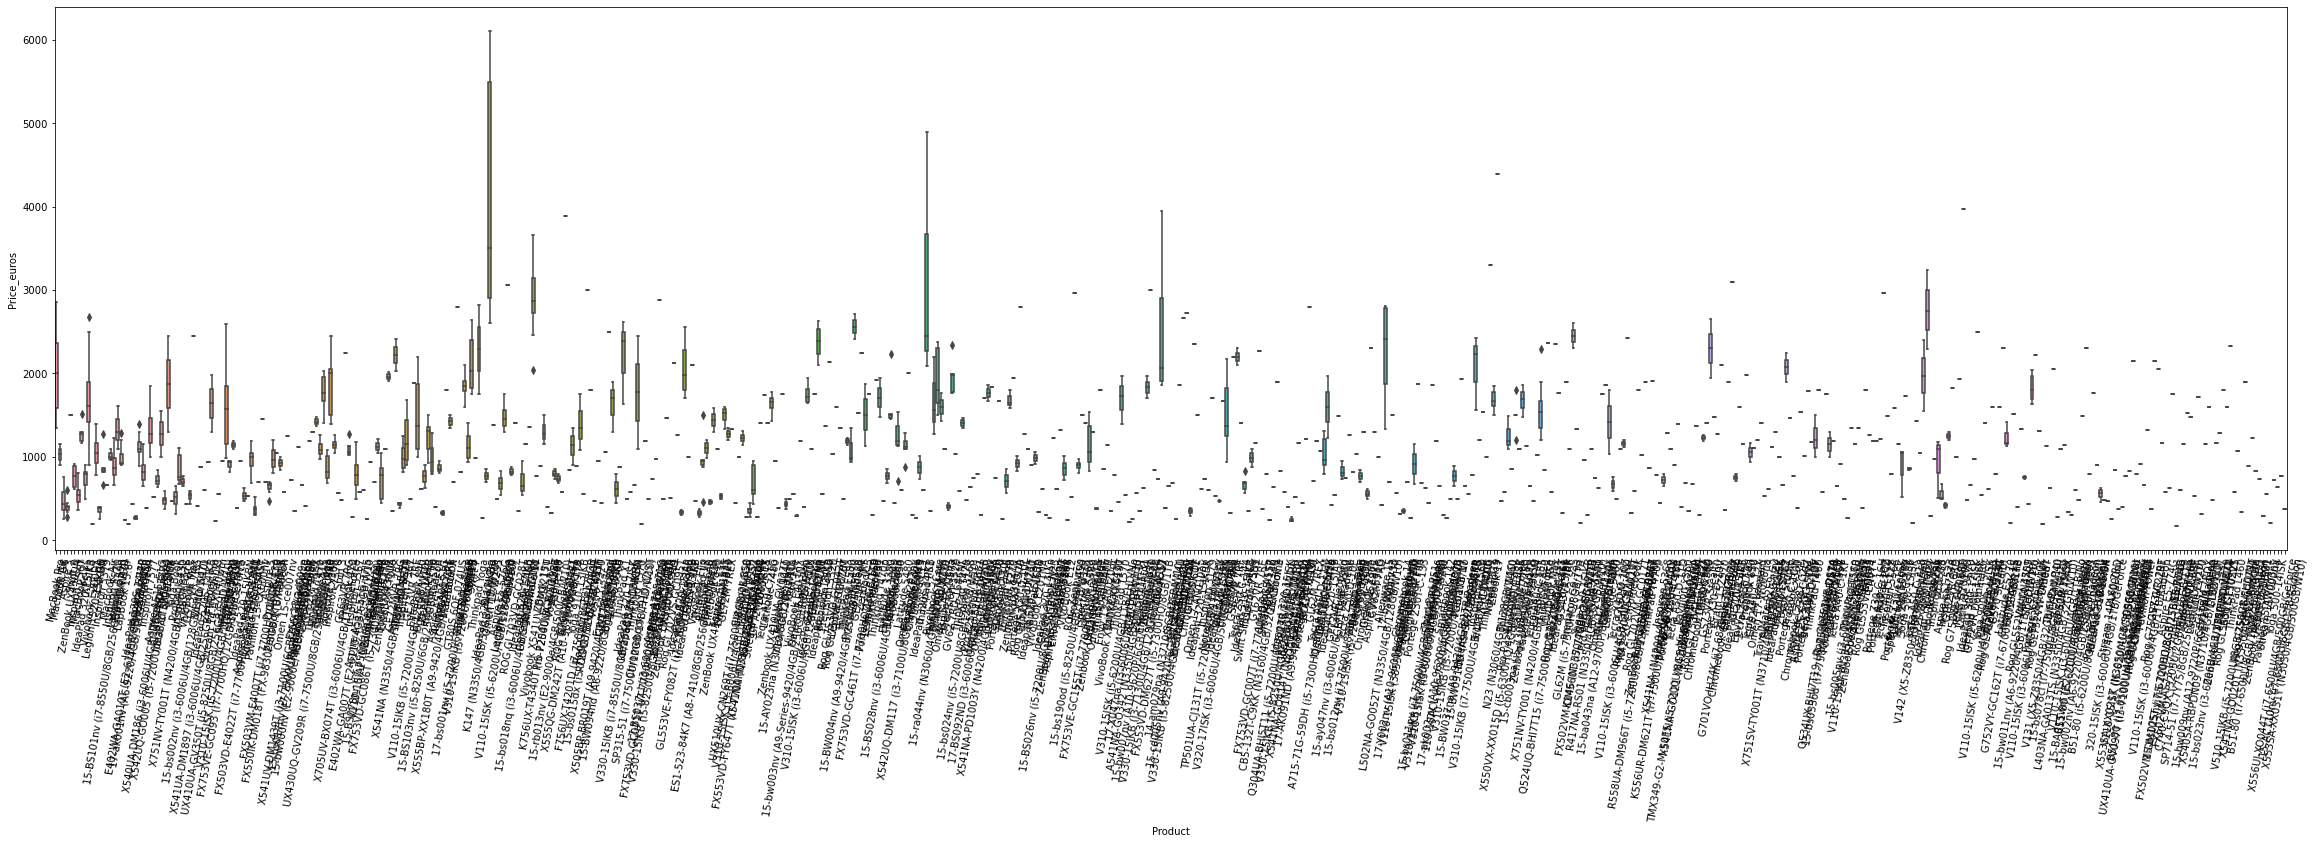

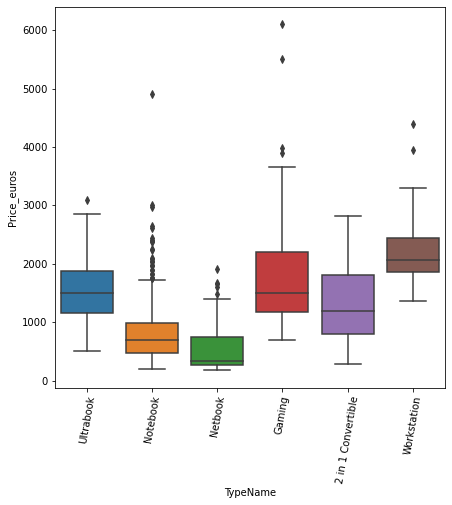

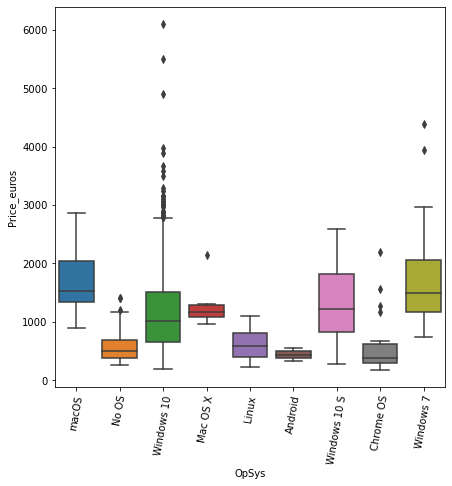

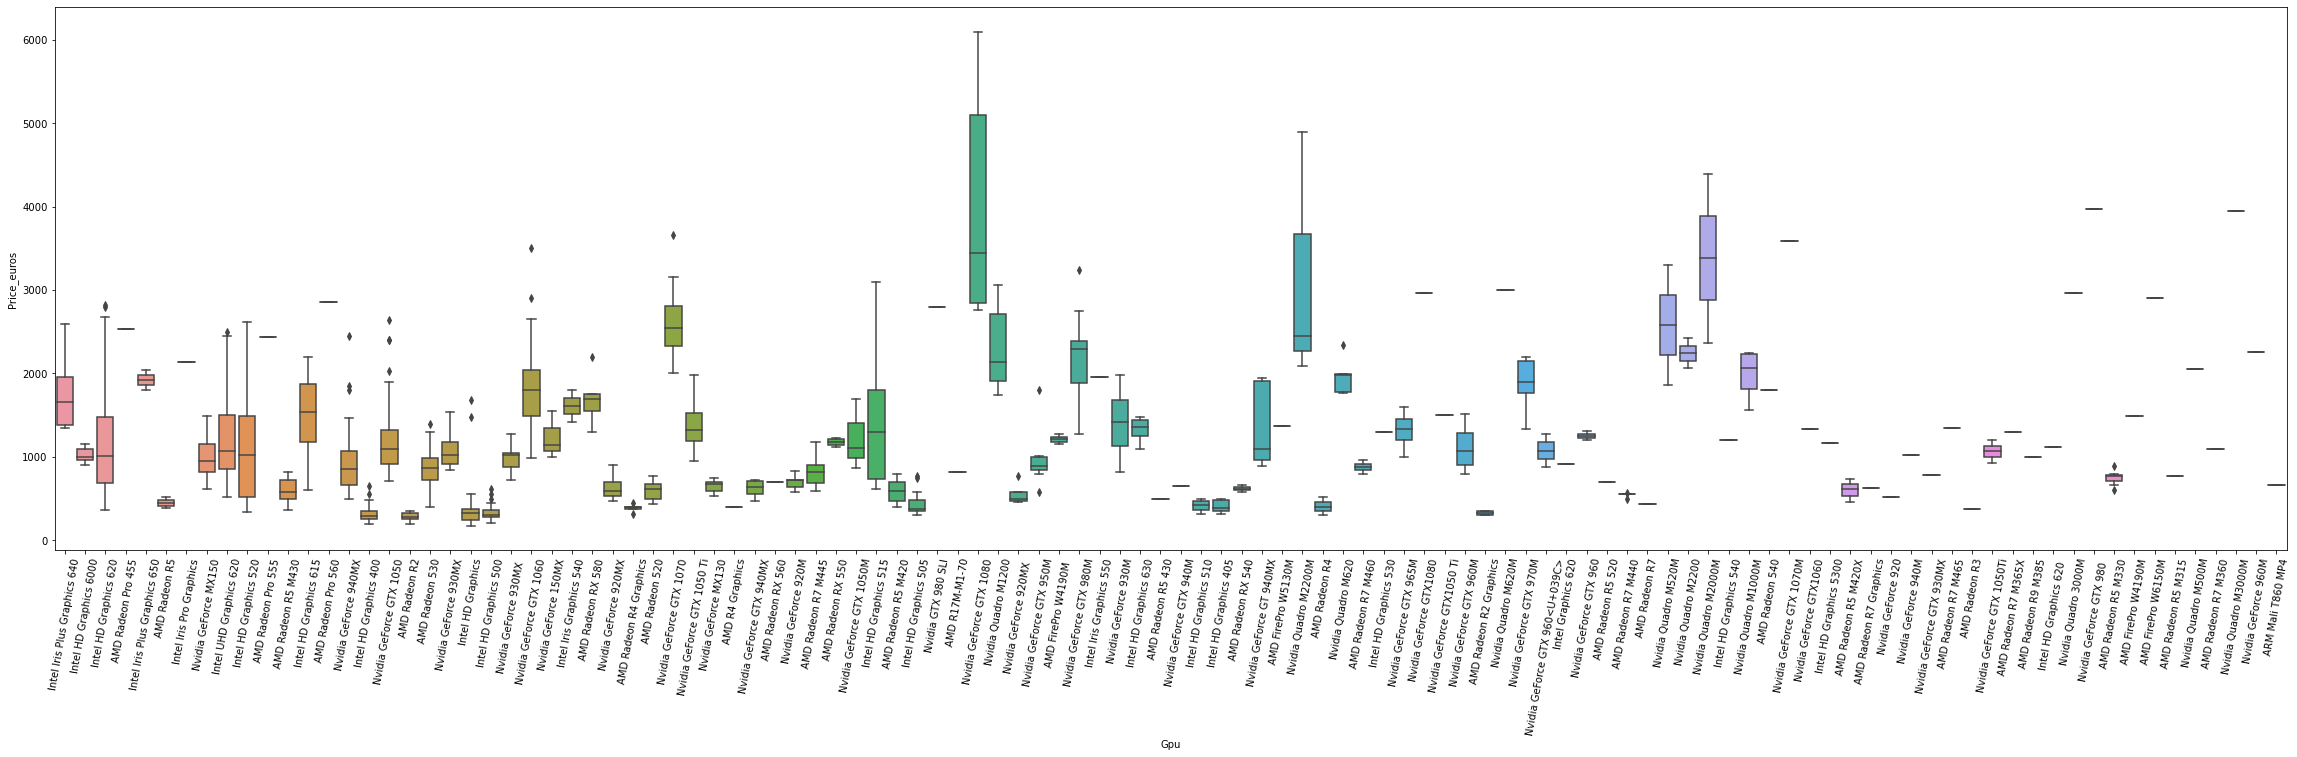

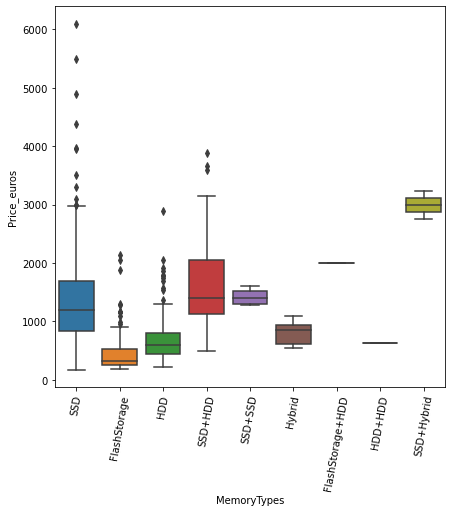

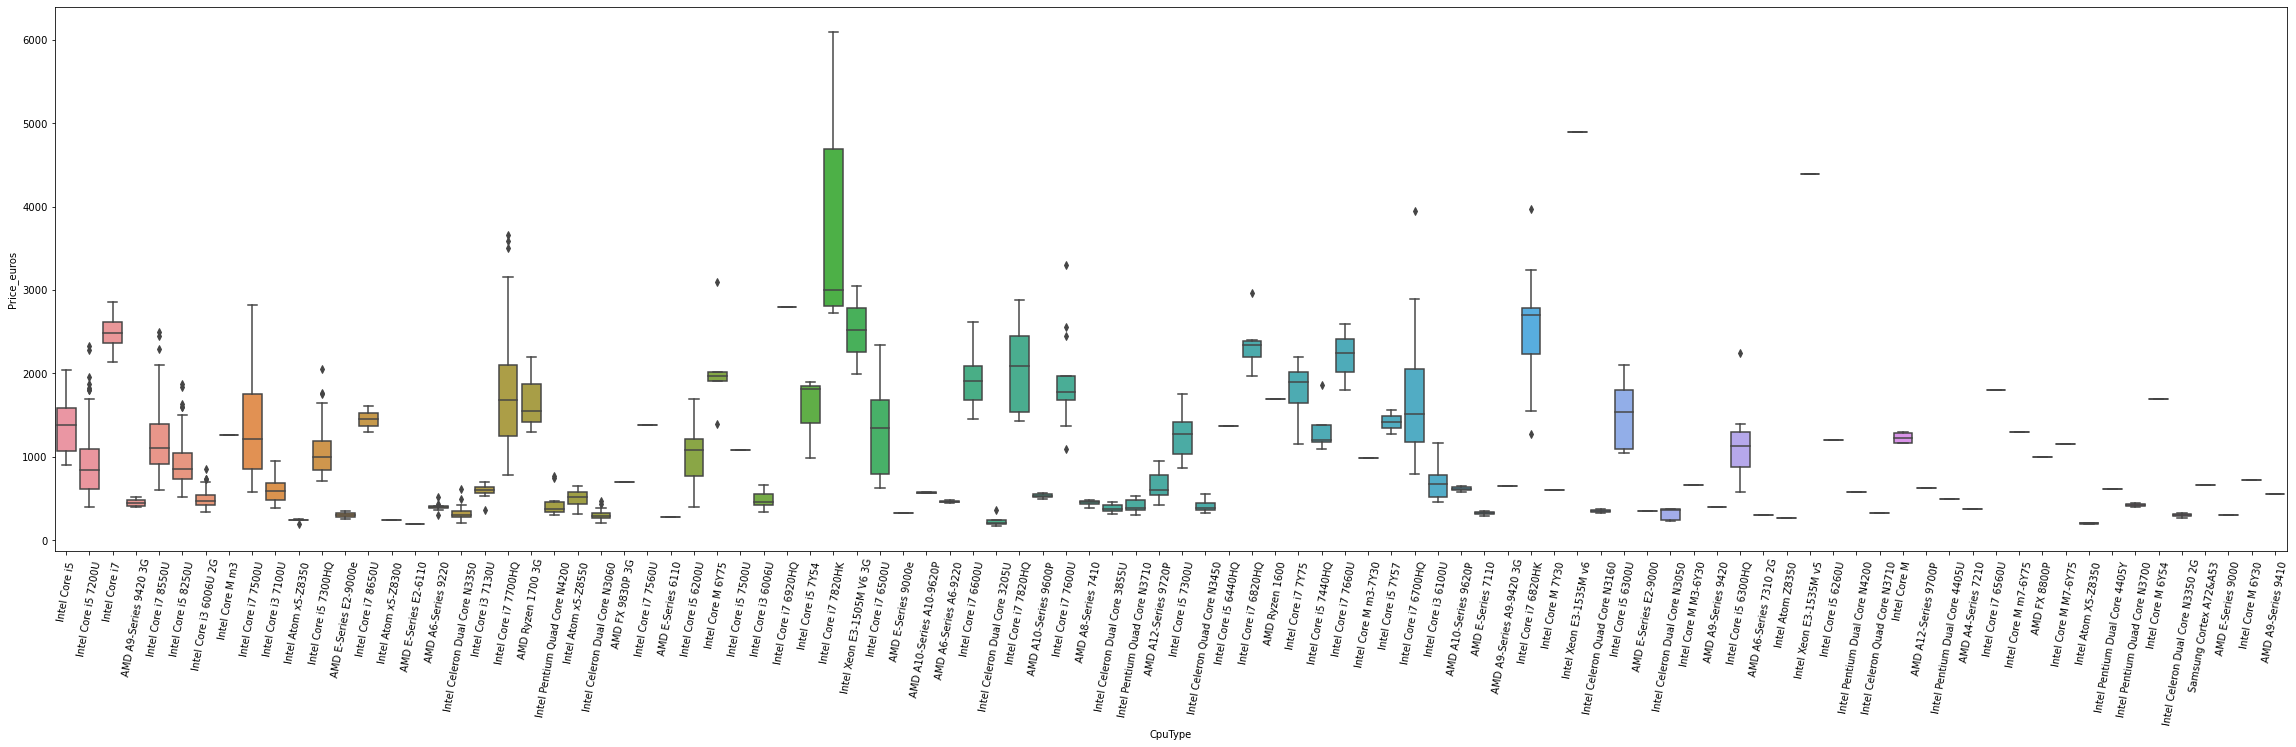

In [12]:
# Boxplot for catgorical inputs vs output.
for i, c in enumerate(cat_columns):
    if c == "CpuType" or c == "Gpu" or c == "Product":
        fig = plt.figure(figsize=(40, 10))
    else:
        fig = plt.figure(figsize=(7, 7))
    sns.boxplot(x=c,y="Price_euros",data=df);
    plt.xticks(rotation=80)
    plt.show()

### Some analysis for apple laptops

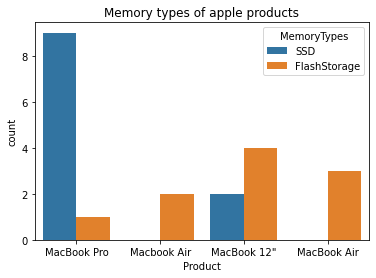

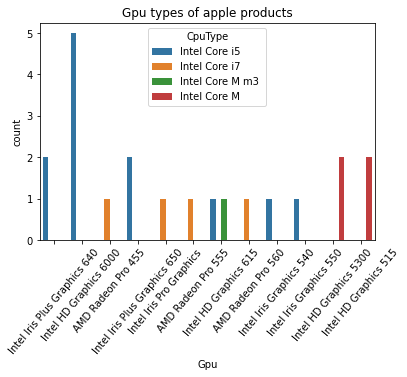

In [13]:
apple = df["Company"] == "Apple"
sns.countplot(x ='Product',hue='MemoryTypes',data = df.loc[apple,:]) 
plt.title('Memory types of apple products')
plt.show()
sns.countplot(x ='Gpu',hue='CpuType',data = df.loc[apple,:]) 
plt.title('Gpu types of apple products')
plt.xticks(rotation = 50)
plt.show()

##  Advanced graphs

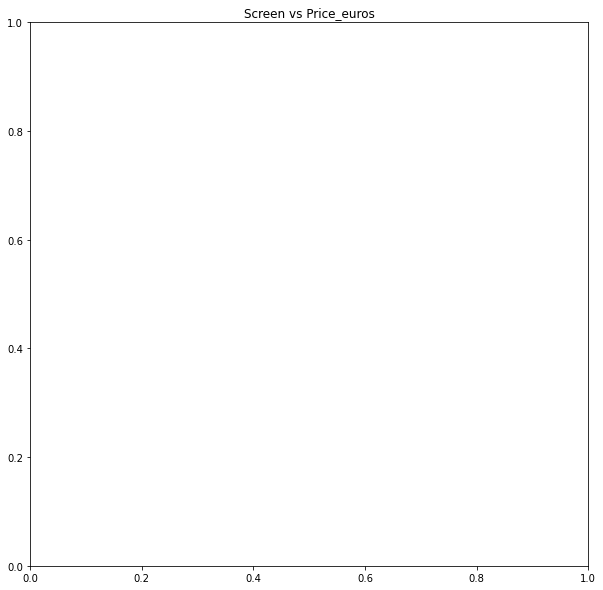

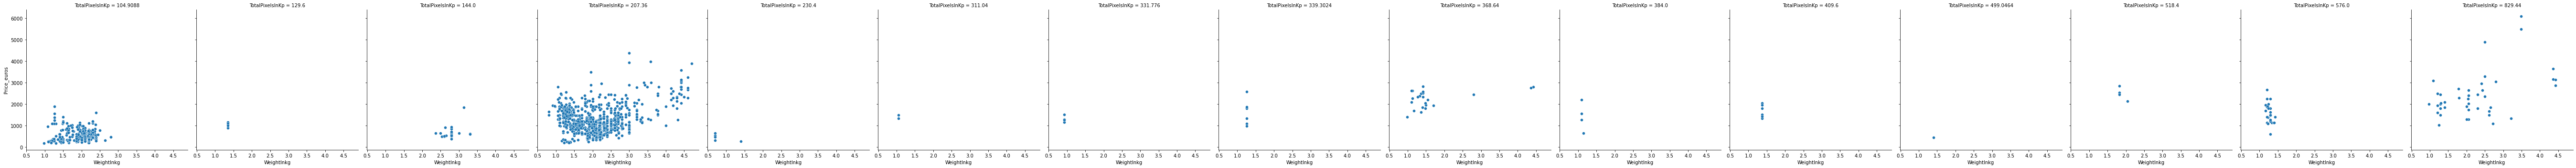

In [14]:
plt.figure(figsize=(10,10))
plt.title("Screen vs Price_euros")
sns.relplot(x="WeightInkg",y="Price_euros",col="TotalPixelsInKp",data=df)
plt.show()

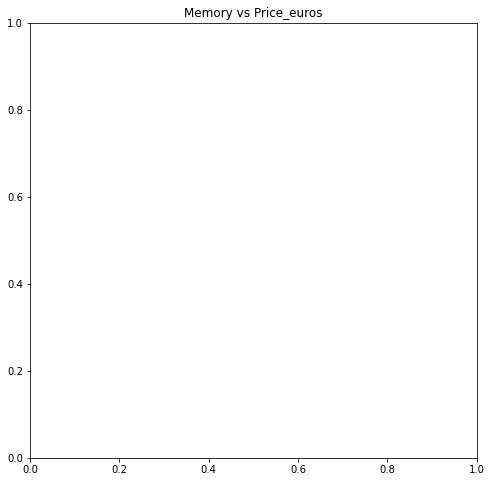

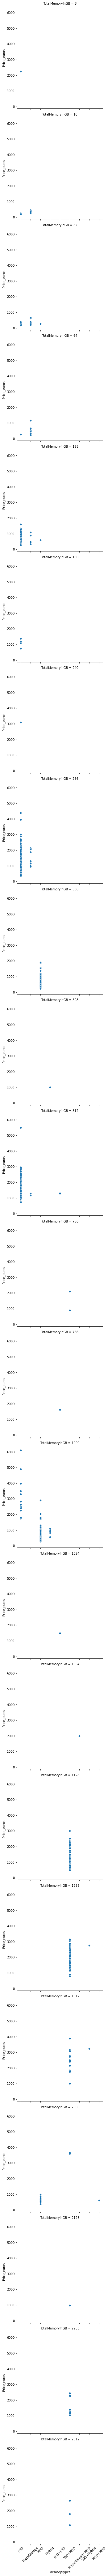

In [15]:
plt.figure(figsize=(8,8))
plt.title("Memory vs Price_euros")
g = sns.relplot(row="TotalMemoryInGB",x="MemoryTypes",y="Price_euros",data=df)
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation = 45)
plt.show()

## Relationship between variables.

In [16]:
corr = df.corr(method = 'pearson')
display(corr)

,TotalPixelsInKp,Inches,TotalMemoryInGB,RamInGB,CpuInGHz,WeightInkg,Price_euros
TotalPixelsInKp,1.000000,-0.086399,0.064800,0.396358,0.126723,-0.044034,0.515486
Inches,-0.086399,1.000000,0.538358,0.237993,0.317025,0.827631,0.068197
TotalMemoryInGB,0.064800,0.538358,1.000000,0.351363,0.242053,0.549754,0.160819
RamInGB,0.396358,0.237993,0.351363,1.000000,0.359047,0.383874,0.743007
CpuInGHz,0.126723,0.317025,0.242053,0.359047,1.000000,0.323971,0.418734
WeightInkg,-0.044034,0.827631,0.549754,0.383874,0.323971,1.000000,0.210370
Price_euros,0.515486,0.068197,0.160819,0.743007,0.418734,0.210370,1.000000


The top three correlated input variables are:  ['RamInGB', 'TotalPixelsInKp', 'CpuInGHz']
Index(['Price_euros', 'RamInGB', 'TotalPixelsInKp', 'CpuInGHz', 'WeightInkg',
       'TotalMemoryInGB', 'Inches'],
      dtype='object')


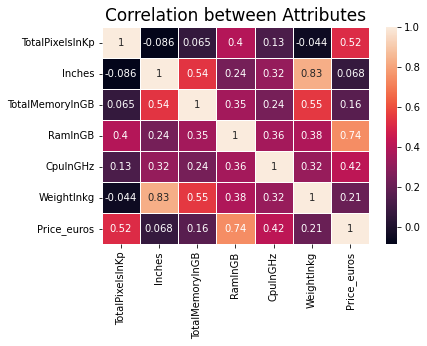

In [17]:
corr = df.select_dtypes(exclude='object').corr()
sns.heatmap(corr,annot=True,lw = 1)
plt.title('Correlation between Attributes', fontsize = 17)
corr=corr.apply(lambda x: np.abs(x))

sorted_corr = corr.sort_values(by=['Price_euros'], ascending=False) # negative values will be considered using abs.

sorted_corr = sorted_corr['Price_euros'].index
print('The top three correlated input variables are: ',sorted_corr[1:4].tolist())
print(sorted_corr)

# Inches and WeightInkg has a strong correlation. For this reason I'll drop Inches to avoid affecting my model.
df = df.drop("Inches",axis=1)

## Principle component analysis.

In [18]:
num_df = df.select_dtypes(exclude='object')

pca_input_columns=num_columns.drop(['Price_euros',"Inches"])

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # get pca model

principalComponents = pca.fit_transform(df[pca_input_columns]) # get two components

## # Same as above in two steps
# pca.fit(df[pca_input_columns])
# principalComponents = pca.transform(df[pca_input_columns])

num_df['pca1'] = principalComponents[:,0]
num_df['pca2'] = principalComponents[:,1]
display(num_df)

,TotalPixelsInKp,TotalMemoryInGB,RamInGB,CpuInGHz,WeightInkg,Price_euros,pca1,pca2
0,409.6000,128,8,2.3,1.37,1339.69,-478.718500,202.890389
1,129.6000,128,8,1.8,1.34,898.94,-484.640365,-77.020754
2,207.3600,256,8,2.5,1.86,575.00,-355.024853,-1.998942
3,518.4000,512,16,2.7,1.83,2537.45,-92.475116,303.624341
4,409.6000,256,8,3.1,1.37,1803.60,-350.747914,200.177176
...,...,...,...,...,...,...,...,...
1298,207.3600,128,4,2.5,1.80,638.00,-483.010667,0.660030
1299,576.0000,512,16,2.5,1.30,1499.00,-91.257400,361.206157
1300,104.9088,64,2,1.6,1.50,229.00,-549.170754,-100.429349
1301,104.9088,1000,6,2.5,2.19,764.00,386.628810,-120.217357


In [19]:
# variation captured by each of the principal components.
for ind,var in enumerate(pca.explained_variance_ratio_):
    print(f'The variance captured by pca {ind+1} is: {var*100: 0.2f}%')

The variance captured by pca 1 is:  91.89%
The variance captured by pca 2 is:  8.10%


In [20]:
import numpy as np
#the coefficients of the linear combination of the columns. 

pca_1_coefficients=np.round(pca.components_[0],4)

zipList=list(zip(pca_input_columns,pca_1_coefficients))
ndf=pd.DataFrame.from_records(zipList,columns=['field','coeff'])

display(ndf.sort_values(by=['coeff'], ascending=False))

,field,coeff
1,TotalMemoryInGB,0.9998
0,TotalPixelsInKp,0.0211
2,RamInGB,0.0038
4,WeightInkg,0.0008
3,CpuInGHz,0.0003


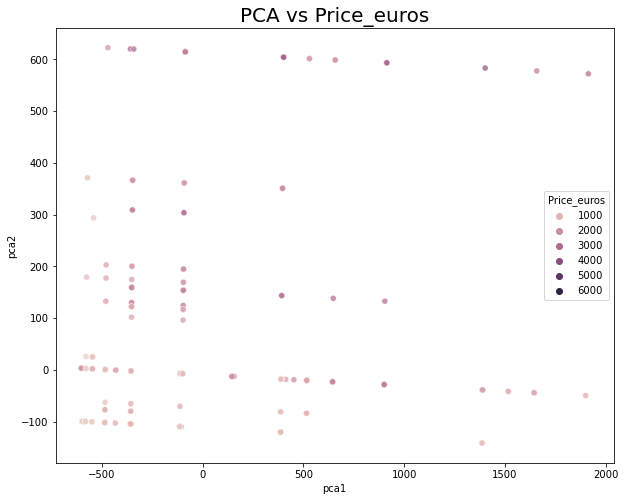

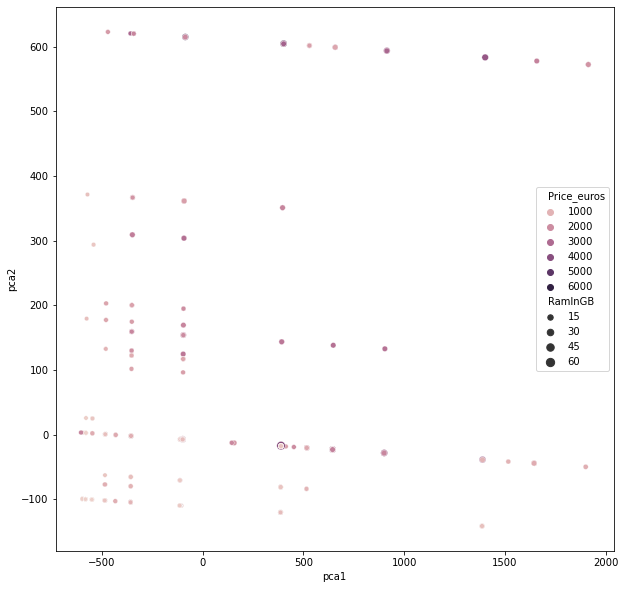

<Figure size 576x576 with 0 Axes>

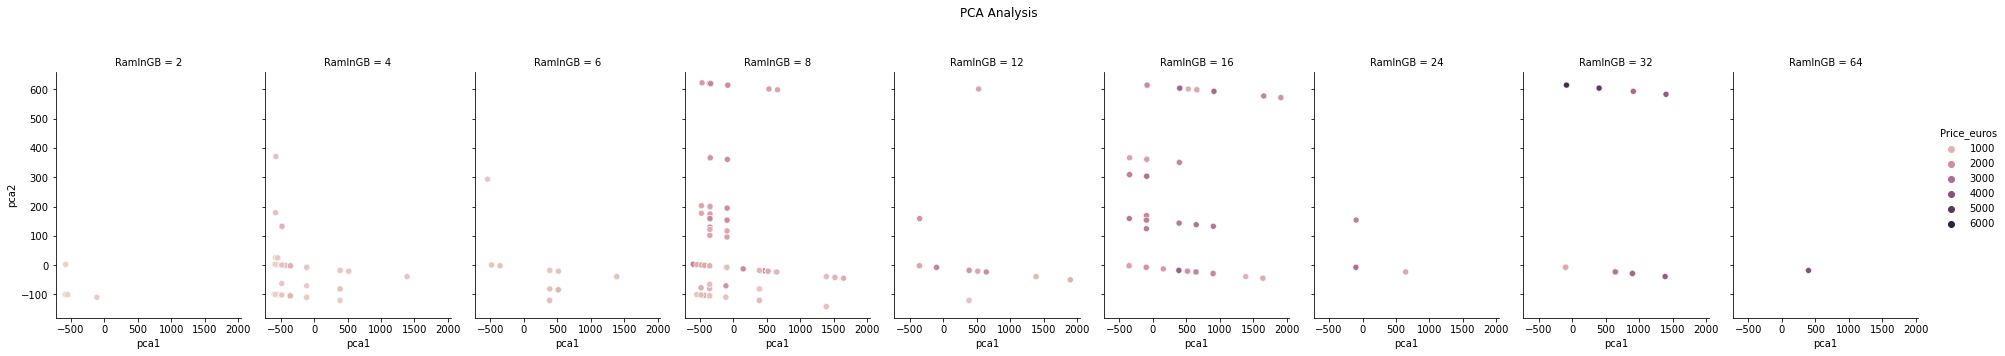

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.scatterplot(x='pca1',y='pca2',
            hue='Price_euros',
            alpha=0.75,
            data=num_df)
plt.title('PCA vs Price_euros', fontsize = 20)
plt.show()

plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1',y='pca2',
            hue='Price_euros',
            size='RamInGB',
            alpha=1,
            data=num_df)
plt.show()

plt.figure(figsize=(8,8))
ax=fig.add_subplot(222)
h=sns.relplot(x='pca1',y='pca2',
            hue='Price_euros',
            col='RamInGB',
            kind='scatter',
            data=num_df, aspect=0.6)
h.fig.suptitle('PCA Analysis') # Title for the complete figure 
h.fig.subplots_adjust( top = 0.8 ) # Adjust subplots so that titles don't overlap with main title
plt.show()

## Summary

In [22]:
# The most expensive laptops are that with SSD memory type and the price increases with
# the increase of the provided space memory.
# The company that produces the most expensive laptobs is Razer.
# The most expensive laptops are gaming laptops or workstation laptops
# The most expensive laptops are that with GPU Nvidia GTX Geforce 1080
# The most expensive laptops are that with CPU Intel core i7 7820HK and the price increases with
# The increase of the provided CPU speed in GHz.
# Apple product only uses SSD memory or FlashStorage memory, Intel Core (i5, i7, M, M m3) Cpu, and 
# Intel Iris Plus Graphics 640, Intel HD Graphics 6000, AMD Radeon Pro 455, Intel Iris Pro Graphics,
# AMD Radeon Pro 555, Intel HD Graphics 615, AMD Radeon Pro 560, Intel Iris Graphics 540,
# Intel Iris Graphics 550, Intel HD Graphics 5300 and Intel HD Graphics 515 GPU.
# Most of the laptops has a weight ranging between 1 to 3 kg, total pixels of 207.36 Kp in screen
# and a price ranging between 200 to 2000 euros.
# The top three columns that has a strong correlation with Price_euros are: RamInGB, TotalPixelsInKp, and CpuInGHz.

# Model building

In [23]:
# # Dropping Product due to the large number of unique values.
# df = df.drop(labels=["Product"],axis=1)

# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# #applying label encoding to nominal variables: Company, TypeName, OpSys, Gpu, MemoryTypes and CpuType.
# encoder = LabelEncoder()
# encoder.fit(df['Company'])
# df['Company'] = encoder.transform(df['Company'])
# encoder.fit(df['TypeName'])
# df['TypeName'] = encoder.transform(df['TypeName'])
# encoder.fit(df['OpSys'])
# df['OpSys'] = encoder.transform(df['OpSys'])
# encoder.fit(df['MemoryTypes'])
# df['MemoryTypes'] = encoder.transform(df['MemoryTypes'])
# encoder.fit(df['Gpu'])
# df['Gpu'] = encoder.transform(df['Gpu'])
# encoder.fit(df['CpuType'])
# df['CpuType'] = encoder.transform(df['CpuType'])

df

,Company,Product,TypeName,OpSys,Gpu,TotalPixelsInKp,MemoryTypes,TotalMemoryInGB,RamInGB,CpuType,CpuInGHz,WeightInkg,Price_euros
0,Apple,MacBook Pro,Ultrabook,macOS,Intel Iris Plus Graphics 640,409.6000,SSD,128,8,Intel Core i5,2.3,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,macOS,Intel HD Graphics 6000,129.6000,FlashStorage,128,8,Intel Core i5,1.8,1.34,898.94
2,HP,250 G6,Notebook,No OS,Intel HD Graphics 620,207.3600,SSD,256,8,Intel Core i5 7200U,2.5,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,macOS,AMD Radeon Pro 455,518.4000,SSD,512,16,Intel Core i7,2.7,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,macOS,Intel Iris Plus Graphics 650,409.6000,SSD,256,8,Intel Core i5,3.1,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,Windows 10,Intel HD Graphics 520,207.3600,SSD,128,4,Intel Core i7 6500U,2.5,1.80,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,Windows 10,Intel HD Graphics 520,576.0000,SSD,512,16,Intel Core i7 6500U,2.5,1.30,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,Windows 10,Intel HD Graphics,104.9088,FlashStorage,64,2,Intel Celeron Dual Core N3050,1.6,1.50,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,Windows 10,AMD Radeon R5 M330,104.9088,HDD,1000,6,Intel Core i7 6500U,2.5,2.19,764.00


## Utilizing the selective parameters obtained from cross validation.

In [26]:
# Scaling the Train - Test splits
# Generate Train - Test splits
from sklearn.model_selection import train_test_split
num_col = df.select_dtypes(exclude = "object").columns
X = df.loc[:,num_col.drop("Price_euros")].values
y = df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=115)
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]
X

array([[ 409.6   ,  128.    ,    8.    ,    2.3   ,    1.37  ],
       [ 129.6   ,  128.    ,    8.    ,    1.8   ,    1.34  ],
       [ 207.36  ,  256.    ,    8.    ,    2.5   ,    1.86  ],
       ...,
       [ 104.9088,   64.    ,    2.    ,    1.6   ,    1.5   ],
       [ 104.9088, 1000.    ,    6.    ,    2.5   ,    2.19  ],
       [ 104.9088,  500.    ,    4.    ,    1.6   ,    2.2   ]])

In [27]:
import numpy as np

Alphas = [1e-3, 1e-2, 1e-1, 1]
print("Lasso regression selective parameters:\n",Alphas)
print("Ridge regression selective parameters:\n",Alphas)

Lasso regression selective parameters:
 [0.001, 0.01, 0.1, 1]
Ridge regression selective parameters:
 [0.001, 0.01, 0.1, 1]


In [28]:
from sklearn.metrics import mean_squared_error

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train) # Only fit traianing data not testing!.
y_pred1 = reg1.predict(X_test)


## Ridge with cross validation of 20.
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=Alphas, fit_intercept=False,cv=20).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)


## Lasso with cross validation of 20.
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=Alphas, fit_intercept=False,cv=20, random_state=935).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)

## Comparing different models based on the performance measures

In [32]:
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))
print()
# Based on the value of the mean square error the best model is: Ridge regression model.
best_beta =  np.round(reg2.coef_,2)
best_beta_0 = np.round(reg2.intercept_,2)
print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())
# The best model is the model whose mse is minimum.
print('The best penalty coefficient is:', reg2.alpha_)
print()
print('The best coefficient estimates are:', reg2.coef_)

print(list(zip(num_col,best_beta.tolist())))

The MSE using OLS is: 0.3293482785248407
The MSE using Ridge is: 0.32934054853228417
The MSE using Lasso is: 0.3303502611236514

The best values for the estimates are : 0.0 [0.26, -0.1, 0.62, 0.2, -0.02]
The best penalty coefficient is: 1.0

The best coefficient estimates are: [ 0.25816942 -0.10220108  0.616001    0.19673852 -0.01927071]
[('TotalPixelsInKp', 0.26), ('TotalMemoryInGB', -0.1), ('RamInGB', 0.62), ('CpuInGHz', 0.2), ('WeightInkg', -0.02)]


## The findings and details of the final selected model.

In [30]:
# The best model is Ridge regression model and based on it we can see that all the columns are relevant to the output
# variable (Price_euros), the most relevant three columns are: RamInGB, TotalPixelsInKp and CpuType.
display(reg2.get_params(deep=True))
print("Ridge regresssion accuracy: ", np.round(reg2.score(X_train, y_train) * 100,0),"%")

# One may predict the price of a laptop by providing the data for Company, TypeName', OpSys', Gpu, TotalPixelsInKp,
#MemoryTypes, TotalMemoryInGB, RamInGB', CpuType', CpuInGHz' and WeightInkg.

{'alpha_per_target': False,
 'alphas': array([0.001, 0.01 , 0.1  , 1.   ]),
 'cv': 20,
 'fit_intercept': False,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

Ridge regresssion accuracy:  64.0 %


# Operationalization:

##  General guidelines

In [ ]:
#We used the Linear Regression Method which may identify how one or more variables are related to an output variable.
#and it will provide details of how input variables affects the output variable.
#regression is a way of predicting an output variable from one or more input variables.
#It assumes the relationship of the input variables and the output variables is linear.
#the main guideline for this method is that the output varible is Numaric which in our case is the Price. 

## The problems and issues in the implementation of the selected methodology.

In [ ]:
# When we splitted the columns to extract numric data some columns ended with a lot of missing values like ScreenType.
# We found some correlated columns that may affect our model but we dropped them.
# Correlation between Price_euros and (CpuType or CpuInGHz) must be higher owing to the fact that the most expensive
# component in the laptop is the cpu.

#  Communicate results:

## Summary and conclusion

In [ ]:
# In conclusion, based on the conducted analysis, stakeholders are suggested to put their intrest on companies that produces
# laptops with the following features: gaming or workstation laptops, mminimum storage of 500 GB SSD type, 
# Nvidia GTX Geforce 1080 GPU, Intel core i7 7820HK CPU, weight range 1 kg - 3 kg, a screen with total of 207.36 Kp pixels, 
# a price range 200 EUR - 2000 EUR.
# In addition, one may use this model to predict the price of a laptop by providing the data for Company, TypeName', 
# OpSys', Gpu, TotalPixelsInKp, MemoryTypes, TotalMemoryInGB, RamInGB', CpuType', CpuInGHz' and WeightInkg. With 70%
# accuracy.

## Future recommendations.

In [ ]:
#If a company need to produce an expensive laptop that could get a large number of purchase they should do the following
# 1- Use SSD memory with 500 GB or more for storage space.
# 2- Build the laptop for gaming or workstation.
# 3- Use Nvidia GTX Geforce 1080 GPU.
# 4- Use Intel core i7 7820HK CPU with the maximum frequency they could provide.
# 5- Provide the maximum Ram they can afford.
# 6- Minimze the weight.
# 7- Use large number of pixels in the screen.